In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
pi = np.pi


In [39]:
def delta_dm(A, fm, fs, pi):
    return 2 * A * fm * pi / fs

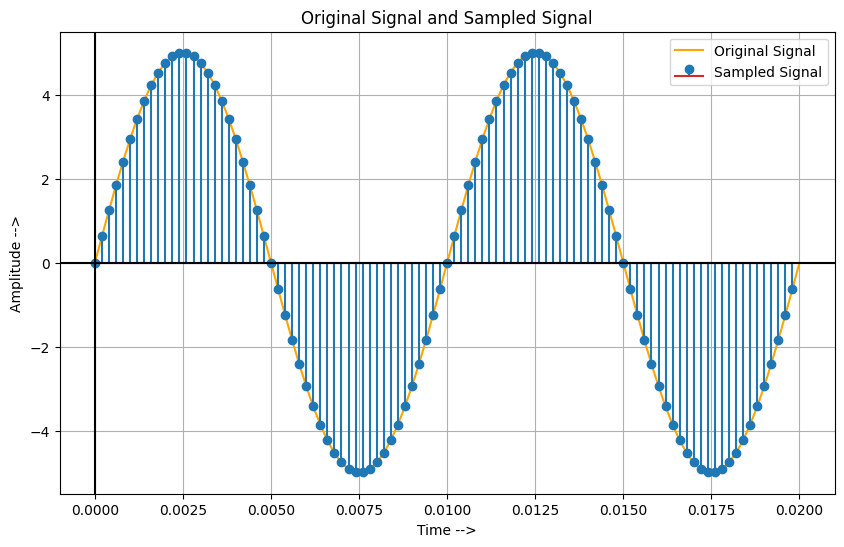

In [40]:
from itertools import cycle


A = 5 #Input signal Amplitude
fm = 100 # Message Frequency
M = 50
fs = M * fm # Sampling frequency
ts = 1 / fs #Sampling Period
cycles = 2 #Number of cycles
t_org = np.linspace(0, M * cycles * ts, 10000)
t_sam = np.arange(0, M * cycles * ts, ts)
x_org = A * np.sin(2 * pi * fm * t_org)
x_sam = A * np.sin(2 * pi * fm * t_sam)

plt.figure(figsize=(10,6))
plt.plot(t_org, x_org, color = 'orange')
plt.stem(t_sam, x_sam)
plt.title('Original Signal and Sampled Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.legend(['Original Signal', 'Sampled Signal'], loc = 'upper right')
plt.grid(True)
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 0, color = 'black')
plt.show()

In [41]:
delta = delta_dm(A, fm, fs, pi)
print(delta)

0.6283185307179586


In [42]:
print(len(t_sam))
print(len(t_org))

100
10000


In [50]:
mq = []
value = 0
for i in range(1,len(t_sam)):
    if i == 0:
        pass
    else:
        error = x_sam[i] - x_sam[i - 1] 
        if error == 0:
            for j in range(2,2 * M):
                mq.append(delta)
        if error > 0:
            value+= delta
            for j in range(2,2 * M):
                mq.append(value)
        else:
            value-= delta
            for j in range(2,2 * M):
                mq.append(value)
print(len(mq))

9996


In [44]:
print(x_sam[1])
print(x_sam[2])

0.6266661678215213
1.243449435824274
0.6283185307179586


In [45]:
m_rec=[]
for i in range(0,len(t_sam)):
    m_rec.append(e[i-1]+quan[i-1])

NameError: name 'e' is not defined

In [ ]:
#Smoothing of the reconstructed signal using Butterworth Low Pass Filter
[b,a]=signal.butter(3,(1/fm)*0.005,fs=0.0005)
rec=signal.lfilter(b,a,quan)

Text(0, 0.5, 'Amplitude')

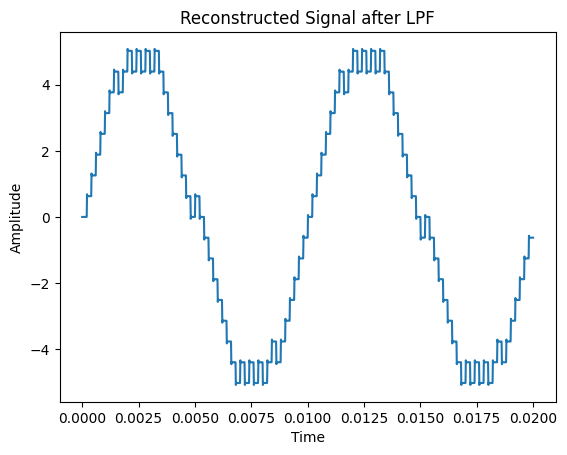

In [ ]:
plt.plot(t_org,rec)
plt.title("Reconstructed Signal after LPF")
plt.xlabel("Time")
plt.ylabel("Amplitude")